In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# CT GROUNDTRUTH CREATION

# Read CSV files containing xy-coordinates for centers of tampered regions
os.chdir(r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal')
ct_removal_coord = pd.read_csv('CT_removal.csv')

os.chdir(r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection')
ct_injection_coord = pd.read_csv('CT_injection.csv')

type                                               path    x    y  \
0   FM  CT/injection/FM_SD/1.3.6.1.4.1.14519.5.2.1.627...  140  143   
1   FM  CT/injection/FM_SD/1.3.6.1.4.1.14519.5.2.1.627...  140  143   
2   FM  CT/injection/FM_SD/1.3.6.1.4.1.14519.5.2.1.627...  140  143   
3   FM  CT/injection/FM_SD/1.3.6.1.4.1.14519.5.2.1.627...  381  356   
4   FM  CT/injection/FM_SD/1.3.6.1.4.1.14519.5.2.1.627...  381  356   

             scanner  cur_slice  CTGAN-CT-injection  SD-CT-injection  
0  LightSpeed Pro 16        132                   0                1  
1  LightSpeed Pro 16        133                   0                1  
2  LightSpeed Pro 16        134                   0                1  
3  LightSpeed Pro 16        144                   0                1  
4  LightSpeed Pro 16        145                   0                1

In [60]:
# Root directory, download directory, CSV path
configs = [
    {
        'dataset_root': r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_SD',
        'output_dir':   r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_SD\FB_SD_groundtruths',
        'csv_path':     r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\CT_removal.csv'
    },
    {
        'dataset_root': r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_CTGAN',
        'output_dir':   r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_CTGAN\FB_CTGAN_groundtruths',
        'csv_path':     r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\CT_removal.csv'
    },
    {
        'dataset_root': r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_SD',
        'output_dir':   r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_SD\FM_SD_groundtruths',
        'csv_path':     r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\CT_injection.csv'
    },
    {
        'dataset_root': r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN',
        'output_dir':   r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\FM_CTGAN_groundtruths',
        'csv_path':     r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\CT_injection.csv'
    },
]

In [90]:
from pathlib import PurePosixPath

# Create groundtruths
patch_size = 96

def normalize_path(path):
    p = PurePosixPath(path.replace('\\', '/').strip())
    if p.suffix == '.npy':
        try:
            # Remove leading zeros from filename (e.g. 077.npy → 77.npy)
            new_name = f"{int(p.stem)}.npy"
            p = p.with_name(new_name)
        except ValueError:
            pass
    return str(p)

for config in configs:
    dataset_root = config['dataset_root']
    output_dir = config['output_dir']
    csv_path = config['csv_path']

    os.makedirs(output_dir, exist_ok=True)

    print(f"Loading CSV: {csv_path}")
    df = pd.read_csv(csv_path)

    tamper_info = {
        normalize_path(row['path']): (int(row['x']), int(row['y']))
        for _, row in df.iterrows()
    }

    for root, dirs, files in os.walk(dataset_root):
        dirs[:] = [d for d in dirs if not d.endswith('_groundtruths')]
        for file in files:
            if file.endswith('.npy'):
                full_path = os.path.join(root, file)
                CT_root = r'C:\Users\angel\Downloads\BTD_unzipped\CT'
                rel_path = os.path.relpath(full_path, CT_root).replace('\\', '/')
                normalized_rel_path = 'CT/' + normalize_path(rel_path)

                if normalized_rel_path in tamper_info:
                    x_center, y_center = tamper_info[normalized_rel_path]

                    image = np.load(full_path)
                    height, width = image.shape

                    mask = np.zeros((height, width), dtype=np.uint8)
                    half_patch = patch_size // 2
                    x_start = max(0, x_center - half_patch)
                    x_end = min(width, x_center + half_patch)
                    y_start = max(0, y_center - half_patch)
                    y_end = min(height, y_center + half_patch)
                    mask[y_start:y_end, x_start:x_end] = 1

                    rel_subfolder = os.path.relpath(root, dataset_root)
                    output_subdir = os.path.join(output_dir, rel_subfolder)
                    os.makedirs(output_subdir, exist_ok=True)

                    save_name = file.replace('.npy', '_groundtruth.npy')
                    mask_path = os.path.join(output_subdir, save_name)
                    np.save(mask_path, mask)

Loading CSV: C:\Users\angel\Downloads\BTD_unzipped\CT\removal\CT_removal.csv
Loaded 1125 tampered entries
Checking file: removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/117.npy
Normalized path: CT/removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/117.npy
✅ Found match for CT/removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/117.npy
Checking file: removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/77.npy
Normalized path: CT/removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/77.npy
✅ Found match for CT/removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860/77.npy
Checking file: removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275/76.npy
Normalized path: CT/removal/FB_SD/1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275/76.npy
✅ Found match for CT/removal/FB_SD/1.3.6.1.4.1.14519.5.2

(512, 512)
(512, 512)


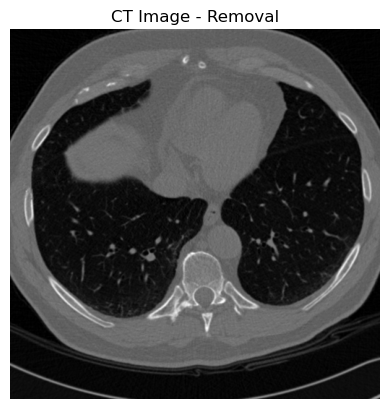

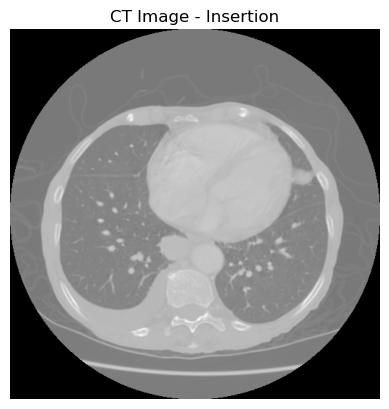

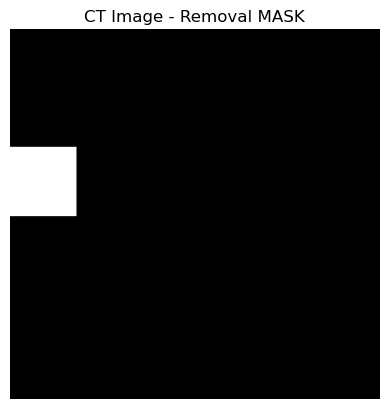

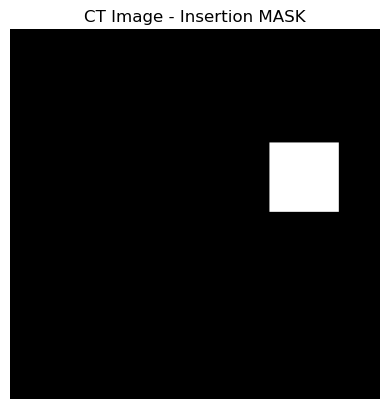

In [98]:
# Check for correctness of groundtruths

# Check two CT scans & corresponding groundtruths
image_path = r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860\077.npy'
image_mask_path = r'C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_CTGAN\FB_CTGAN_groundtruths\1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860\077_groundtruth.npy'
image_path2 = r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335\133.npy'
image_mask_path2 = r'C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\FM_CTGAN_groundtruths\1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335\133_groundtruth.npy'

# Load the numpy arrays
img = np.load(image_path)
print(img.shape)
img2 = np.load(image_path2)
print(img2.shape)
imgmask1 = np.load(image_mask_path)
imgmask2 = np.load(image_mask_path2)

# Display CT scans & groundtruths
plt.imshow(img, cmap='gray')
plt.title("CT Image - Removal")
plt.axis('off')
plt.show()
plt.imshow(img2, cmap='gray')
plt.title("CT Image - Insertion")
plt.axis('off')
plt.show()
plt.imshow(imgmask1, cmap='gray')
plt.title("CT Image - Removal MASK")
plt.axis('off')
plt.show()
plt.imshow(imgmask2, cmap='gray')
plt.title("CT Image - Insertion MASK")
plt.axis('off')
plt.show()

In [100]:
# MRI GROUNDTRUTH CREATION

# Read CSV files containing xy-coordinates for centers of tampered regions
os.chdir(r'C:\Users\angel\Downloads\BTD_unzipped\MRI')
mri_removal_coord = pd.read_csv('MRI_removal.csv')
mri_removal_coord.head()
mri_injection_coord = pd.read_csv('MRI_injection.csv')
mri_injection_coord.head()

type                                             path    x    y     scanner
0   FM  MRI/Signa HDxt/Breast_MRI_025/injection_034.png  430  237  Signa HDxt
1   FM  MRI/Signa HDxt/Breast_MRI_025/injection_035.png  430  237  Signa HDxt
2   FM  MRI/Signa HDxt/Breast_MRI_025/injection_036.png  430  237  Signa HDxt
3   FM  MRI/Signa HDxt/Breast_MRI_025/injection_037.png  430  237  Signa HDxt
4   FM  MRI/Signa HDxt/Breast_MRI_025/injection_038.png  430  237  Signa HDxt

In [114]:
!pip install opencv-python
import cv2

# Root directory, download directory
MRI_root = r"C:\Users\angel\Downloads\BTD_unzipped\MRI"
output_root = r"C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized"

# Normalize all images
def normalize_image_and_save(input_path, output_path):
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Could not read image: {input_path}")
        return
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    norm_img = clahe.apply(img)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, norm_img)
    print(f"✅ Saved normalized: {output_path}")

for root, dirs, files in os.walk(MRI_root):
    for file in files:
        if file.endswith('.png'):
            input_path = os.path.join(root, file)
            rel_path = os.path.relpath(input_path, MRI_root)
            base, ext = os.path.splitext(rel_path)
            new_filename = base + "_normalized" + ext
            output_path = os.path.join(output_root, new_filename)
            normalize_image_and_save(input_path, output_path)

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\067_normalized.png
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\067_fake_normalized.png
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\068_normalized.png
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\068_fake_normalized.png
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\069_normalized.png
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\069_fake_normalized.png
✅ Saved normalized: C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\Avanto\Breast_MRI_039\070_normalized.png
✅ Saved normalized: C:\Users\angel\D

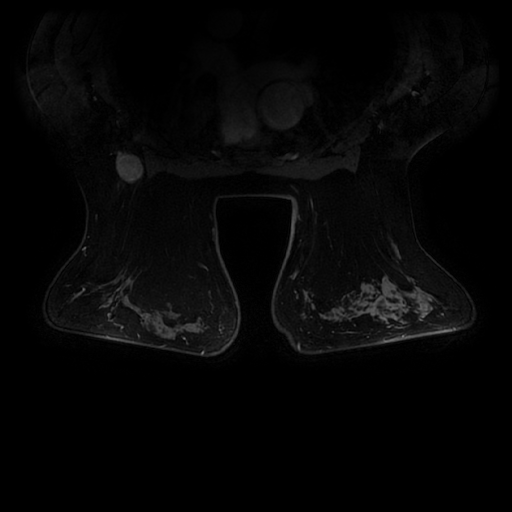

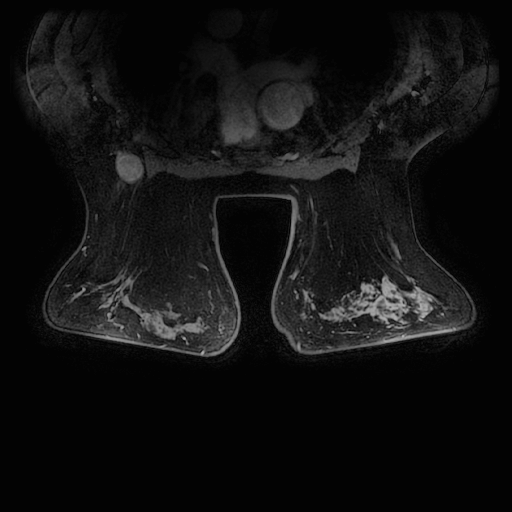

In [120]:
from IPython.display import display
from IPython.display import Image as IPyImage  # rename to avoid conflict with PIL.Image

# Check for correctness of normalized images
image_path = r'C:\Users\angel\Downloads\BTD_unzipped\MRI\Signa HDxt\Breast_MRI_130\069.png'
display(IPyImage(filename=image_path))
image_normalized_path = r'C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized\SIgna HDxt\Breast_MRI_130\069_normalized.png'
display(IPyImage(filename=image_normalized_path))

In [152]:
from PIL import Image
from pathlib import Path

# Create groundtruths
threshold = 84

MRI_root = r"C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized"
output_base = r"C:\Users\angel\Downloads\BTD_unzipped"

camera_folders = ['Signa HDxt', 'Optima MR450w', 'Signa HDx', 'Avanto']

def create_mask(original_path, tampered_path, threshold=84):
    orig = np.array(Image.open(original_path).convert('L'))
    fake = np.array(Image.open(tampered_path).convert('L'))
    diff = np.abs(orig.astype(int) - fake.astype(int))
    mask = (diff > threshold).astype(np.uint8) * 255
    return mask

for camera in camera_folders:
    camera_root = os.path.join(MRI_root, camera)
    groundtruth_root = os.path.join(output_base, f"{camera}_groundtruths")
    
    for root, dirs, files in os.walk(camera_root):
        for file in files:
            if file.endswith('_normalized.png') and not (file.startswith('injection_') or file.endswith('_fake_normalized.png')):
                original_path = os.path.join(root, file)

                base_name = file.replace('_normalized.png', '')
                folder_rel = os.path.relpath(root, MRI_root)

                fake_name = base_name + '_fake_normalized.png'
                injection_name = 'injection_' + base_name + '_normalized.png'

                fake_path = os.path.join(root, fake_name)
                injection_path = os.path.join(root, injection_name)

                for tampered_path, tamper_type in [
                    (fake_path, 'removal'),
                    (injection_path, 'injection')
                ]:
                    if os.path.exists(tampered_path):
                        mask = create_mask(original_path, tampered_path, threshold)

                        mask_filename = f"{base_name}_{tamper_type}_groundtruth.png"
                        save_path = os.path.join(groundtruth_root, folder_rel, mask_filename)

                        os.makedirs(os.path.dirname(save_path), exist_ok=True)
                        Image.fromarray(mask).save(save_path)

📸 Processing: Signa HDxt
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\034_removal_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\034_injection_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\035_removal_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\035_injection_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\036_removal_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\036_injection_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_025\037_removal_groundtruth.png
✅ Saved: C:\Users\angel\Downloads\BTD_unzipped\Signa HDxt_groundtruths\Signa HDxt\Breast_MRI_0

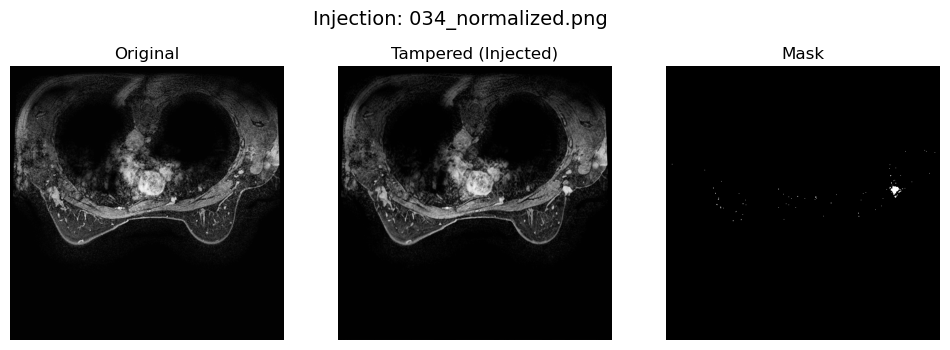

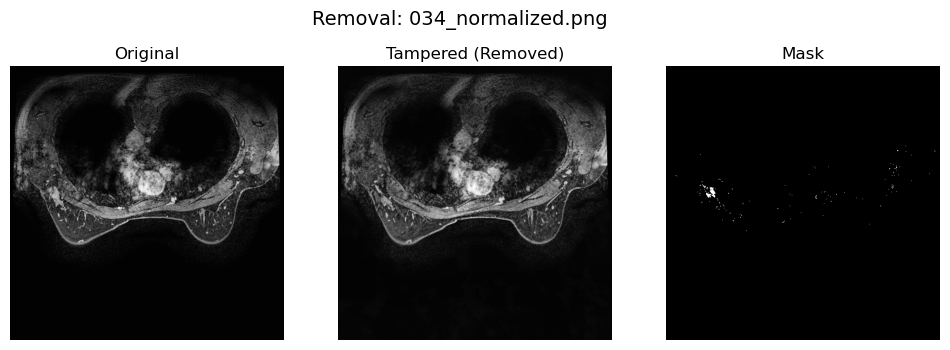

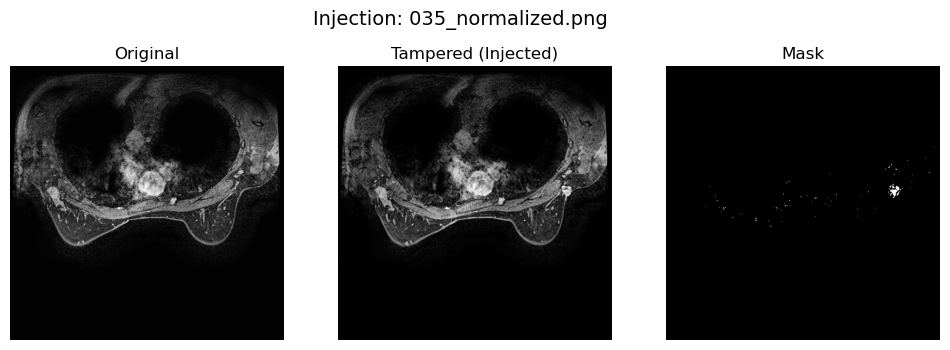

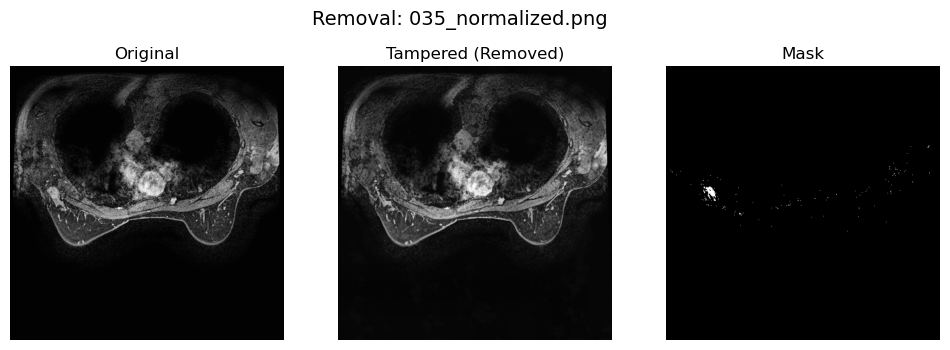

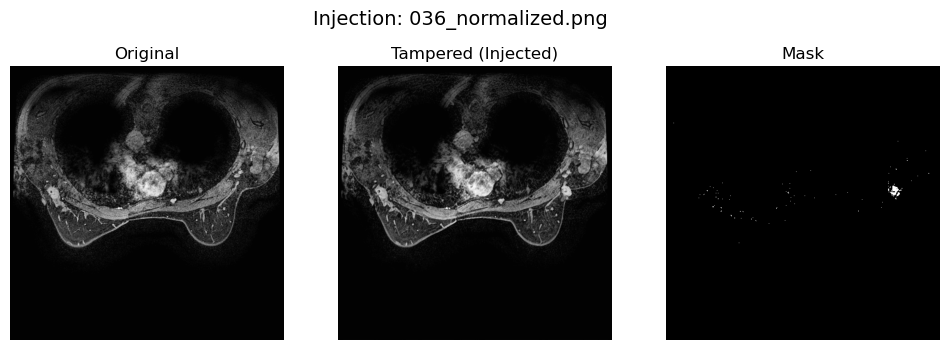

In [150]:
# Check for correctness of groundtruths

MRI_root = r"C:\Users\angel\Downloads\BTD_unzipped\MRI_normalized"
camera_folder = os.path.join(MRI_root, "Signa HDxt")

# Parameters
threshold_value = 84  # Adjust as needed
max_visualizations = 5  # Limit to a few examples for speed

# Collect and visualize
count = 0
for breast_dir in os.listdir(camera_folder):
    breast_path = os.path.join(camera_folder, breast_dir)
    if not os.path.isdir(breast_path):
        continue

    for file in os.listdir(breast_path):
        if file.endswith("_normalized.png") and not file.startswith("injection_") and not file.endswith("_fake_normalized.png"):
            base_name = file.replace("_normalized.png", "")
            original_path = os.path.join(breast_path, file)
            injection_path = os.path.join(breast_path, f"injection_{base_name}_normalized.png")
            removal_path = os.path.join(breast_path, f"{base_name}_fake_normalized.png")

            if os.path.exists(injection_path):
                original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
                tampered = cv2.imread(injection_path, cv2.IMREAD_GRAYSCALE)
                diff = cv2.absdiff(original, tampered)
                _, binary_mask = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

                # Plot
                plt.figure(figsize=(12, 4))
                plt.suptitle(f"Injection: {file}", fontsize=14)
                plt.subplot(1, 3, 1)
                plt.imshow(original, cmap='gray')
                plt.title("Original")
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(tampered, cmap='gray')
                plt.title("Tampered (Injected)")
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(binary_mask, cmap='gray')
                plt.title("Mask")
                plt.axis('off')

                plt.show()
                count += 1
                if count >= max_visualizations:
                    break

            if os.path.exists(removal_path):
                original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
                tampered = cv2.imread(removal_path, cv2.IMREAD_GRAYSCALE)
                diff = cv2.absdiff(original, tampered)
                _, binary_mask = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

                # Plot
                plt.figure(figsize=(12, 4))
                plt.suptitle(f"Removal: {file}", fontsize=14)
                plt.subplot(1, 3, 1)
                plt.imshow(original, cmap='gray')
                plt.title("Original")
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(tampered, cmap='gray')
                plt.title("Tampered (Removed)")
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(binary_mask, cmap='gray')
                plt.title("Mask")
                plt.axis('off')

                plt.show()
                count += 1
                if count >= max_visualizations:
                    break
    if count >= max_visualizations:
        break

Displaying 6 augmentations of .npy mask: C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_SD\1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860\77.npy


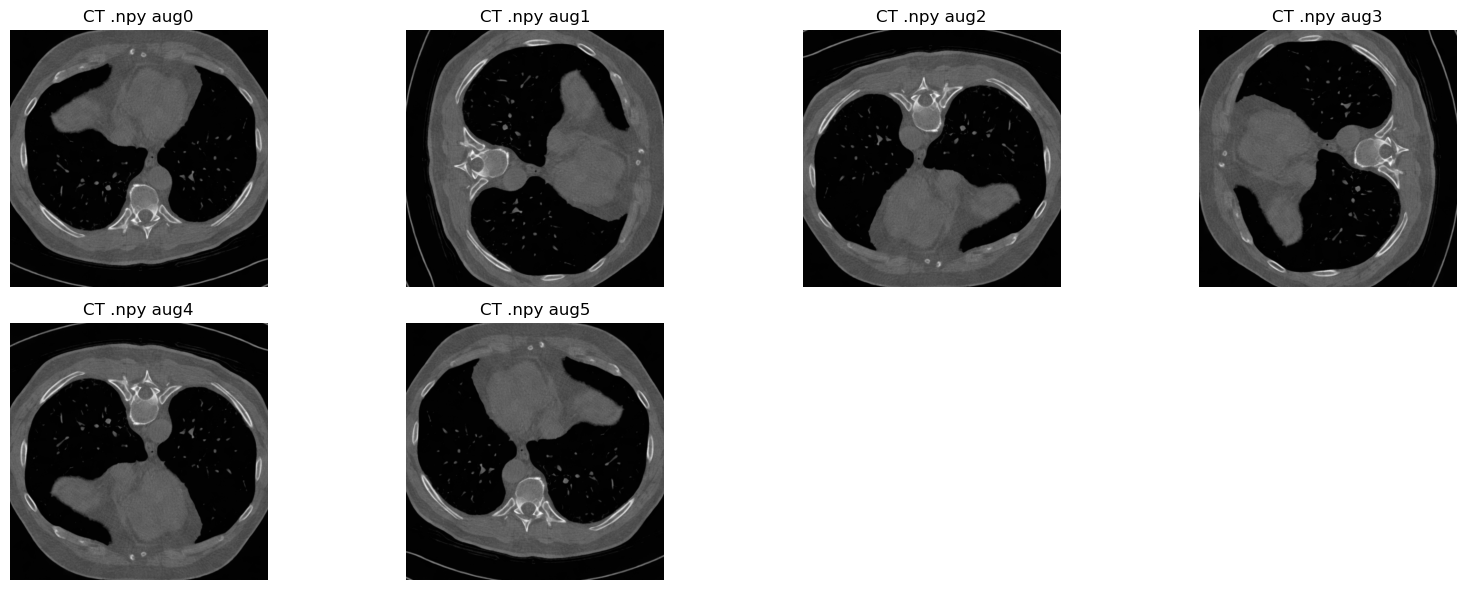

Displaying 6 augmentations of .png image: C:\Users\angel\Downloads\BTD_unzipped\MRI\Signa HDxt\Breast_MRI_130\069.png


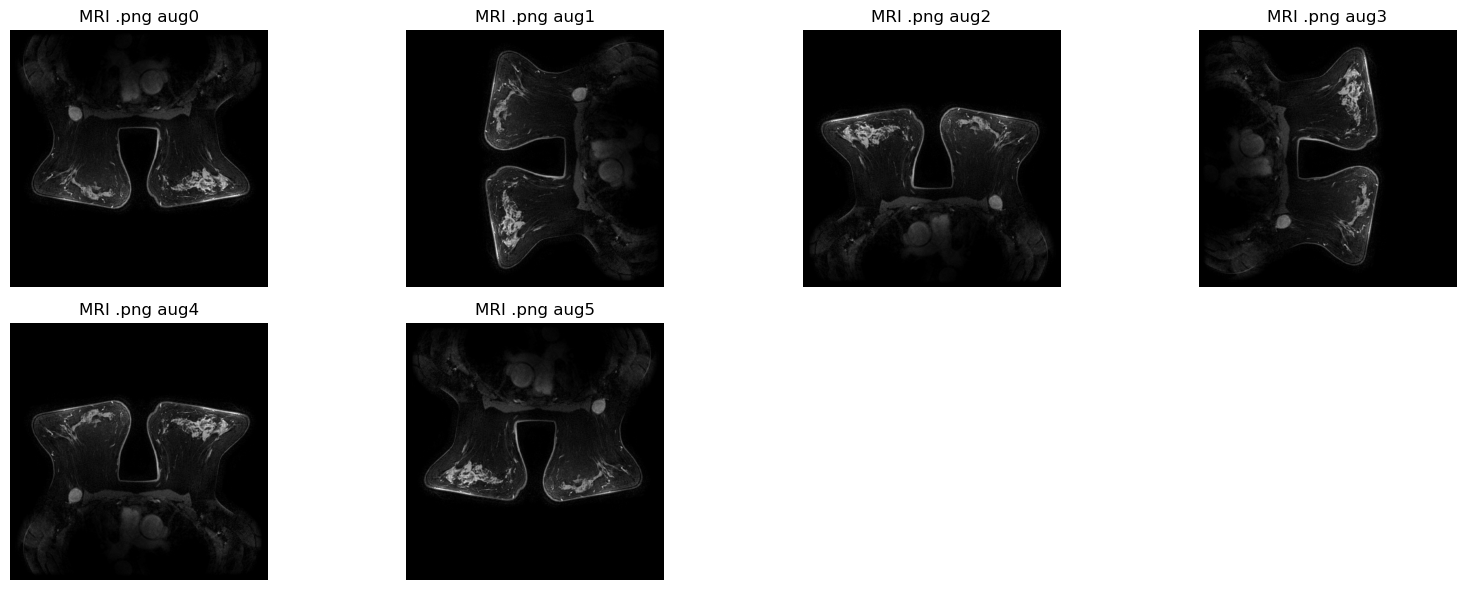

In [161]:
# DATA AUGMENTATION

# Six augmentations: Original, rotation by 90, 180, & 270 degrees CCW, reflection about x & y axis
def augmentations(img):
    return [
        img,  # original
        cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),
        cv2.rotate(img, cv2.ROTATE_180),
        cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE),
        cv2.flip(img, 0),  # vertical flip (x-axis)
        cv2.flip(img, 1),  # horizontal flip (y-axis)
    ]

# Check for correctness of augmentations
sample_image_path = r"C:\Users\angel\Downloads\BTD_unzipped\CT\removal\FB_SD\1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860\77.npy"
sample_png_path = r"C:\Users\angel\Downloads\BTD_unzipped\MRI\Signa HDxt\Breast_MRI_130\069.png"

def visualize_augmented_versions(img, title_prefix):
    aug_imgs = augmentations(img)
    plt.figure(figsize=(16, 6))
    for i, aug in enumerate(aug_imgs):
        plt.subplot(2, 4, i + 1)
        plt.imshow(aug, cmap='gray')
        plt.title(f"{title_prefix} aug{i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize augmented CT
if sample_image_path.endswith(".npy"):
    img_npy = np.load(sample_image_path)
    print(f"Displaying 6 augmentations of .npy mask: {sample_image_path}")
    visualize_augmented_versions(img_npy, "CT .npy")

# Visualize augmented MRI
img_png = cv2.imread(sample_png_path, cv2.IMREAD_GRAYSCALE)

In [164]:
import os
import numpy as np
from PIL import Image, ImageOps

# Input paths
input_dirs = [
    r"C:\Users\angel\Downloads\BTD_unzipped\CT",                    # CT images (.npy)
    r"C:\Users\angel\Downloads\BTD_unzipped\MRI",                   # MRI images (.png)
    r"C:\Users\angel\Downloads\BTD_unzipped\MRI_groundtruths"       # MRI groundtruths (.png)
]

# Output paths
output_dirs = [
    r"C:\Users\angel\Downloads\BTD_unzipped\CT_augmented",                   # CT images (.npy)
    r"C:\Users\angel\Downloads\BTD_unzipped\MRI_augmented",                  # MRI images (.png)
    r"C:\Users\angel\Downloads\BTD_unzipped\MRI_groundtruths_augmented"      # MRI groundtruths (.png)
]

# Apply augmentations
def augment_pil(img):
    return {
        "orig": img,
        "rot90": img.rotate(90, expand=True),
        "rot180": img.rotate(180, expand=True),
        "rot270": img.rotate(270, expand=True),
        "flip_v": ImageOps.flip(img),
        "flip_h": ImageOps.mirror(img)
    }

def augment_array(img_array):
    return {
        "orig": img_array,
        "rot90": np.rot90(img_array, k=1),
        "rot180": np.rot90(img_array, k=2),
        "rot270": np.rot90(img_array, k=3),
        "flip_v": np.flipud(img_array),
        "flip_h": np.fliplr(img_array)
    }

for in_dir, out_dir in zip(input_dirs, output_dirs):
    for root, _, files in os.walk(in_dir):
        for file in files:
            file_path = os.path.join(root, file)
            rel_path = os.path.relpath(file_path, in_dir)
            base, ext = os.path.splitext(rel_path)

            try:
                if ext.lower() == ".png":
                    # Augment MRI images & groundtruths
                    img = Image.open(file_path).convert("L")
                    aug_imgs = augment_pil(img)

                    for aug_name, aug_img in aug_imgs.items():
                        save_name = base + f"_{aug_name}.png"
                        save_path = os.path.join(out_dir, save_name)
                        os.makedirs(os.path.dirname(save_path), exist_ok=True)
                        aug_img.save(save_path)

                elif ext.lower() == ".npy":
                    # Augment CT images & groundtruths
                    arr = np.load(file_path)
                    aug_arrays = augment_array(arr)

                    for aug_name, aug_arr in aug_arrays.items():
                        save_name = base + f"_{aug_name}.npy"
                        save_path = os.path.join(out_dir, save_name)
                        os.makedirs(os.path.dirname(save_path), exist_ok=True)
                        np.save(save_path, aug_arr)

            except Exception as e:
                print(f"Failed on {file_path}: {e}")

✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\CT_injection.csv
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\data.csv
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.106419850406056634877579573537\102.npy
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.106419850406056634877579573537\103.npy
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.106419850406056634877579573537\104.npy
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.106419850406056634877579573537\111.npy
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.106419850406056634877579573537\112.npy
✅ Augmented: C:\Users\angel\Downloads\BTD_unzipped\CT\injection\FM_CTGAN\1.3.6.1.4.1.14519.5.2.1.6279.6001.